## IMPORTING LIBRARIES

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")

## ML ALGORITHMS ###

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

## BUILDING MODELS ##

In [34]:
from sklearn.model_selection import train_test_split

## FOR MEASURING METRICS##

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## IGNORE WARNINGS ##

In [36]:
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET## 

In [37]:
df=pd.read_csv("fakeonlinereviews.csv")
print(df)
##check if the data is properly loaded
print("size of the dataset:",df.shape)
df.head()

               category  rating label  \
0    Home_and_Kitchen_5     5.0    CG   
1    Home_and_Kitchen_5     5.0    CG   
2    Home_and_Kitchen_5     5.0    CG   
3    Home_and_Kitchen_5     1.0    CG   
4    Home_and_Kitchen_5     5.0    CG   
5    Home_and_Kitchen_5     3.0    CG   
6    Home_and_Kitchen_5     5.0    CG   
7    Home_and_Kitchen_5     3.0    CG   
8    Home_and_Kitchen_5     5.0    CG   
9    Home_and_Kitchen_5     5.0    CG   
10   Home_and_Kitchen_5     5.0    CG   
11   Home_and_Kitchen_5     5.0    CG   
12   Home_and_Kitchen_5     5.0    CG   
13   Home_and_Kitchen_5     1.0    CG   
14   Home_and_Kitchen_5     5.0    CG   
15   Home_and_Kitchen_5     5.0    CG   
16   Home_and_Kitchen_5     5.0    CG   
17   Home_and_Kitchen_5     5.0    CG   
18   Home_and_Kitchen_5     5.0    CG   
19   Home_and_Kitchen_5     5.0    CG   
20   Home_and_Kitchen_5     5.0    CG   
21   Home_and_Kitchen_5     5.0    CG   
22   Home_and_Kitchen_5     5.0    CG   
23   Home_and_Ki

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [38]:
df.dropna(inplace=True)

In [39]:
##list the columns along with type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 471
Data columns (total 4 columns):
category    472 non-null object
rating      472 non-null float64
label       472 non-null object
text_       472 non-null object
dtypes: float64(1), object(3)
memory usage: 18.4+ KB


## EXPLORE THE DATASET##

In [40]:
#summarizes the data
df.describe()
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [41]:
df['length'] = df['text_'].apply(len)

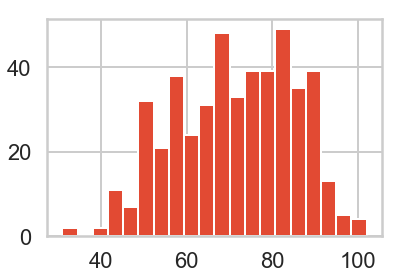

In [42]:
plt.hist(df['length'],bins=20)
plt.show()

In [43]:
df.groupby('label').describe()

length                                                      rating  \
       count       mean        std   min   25%   50%   75%    max  count   
label                                                                      
CG     242.0  80.012397  10.131288  44.0  74.0  82.0  87.0  102.0  242.0   
OR     230.0  62.126087  11.147550  31.0  54.0  61.5  70.0   92.0  230.0   

                                                    
           mean       std  min  25%  50%  75%  max  
label                                               
CG     4.359504  1.187282  1.0  4.0  5.0  5.0  5.0  
OR     4.365217  1.143277  1.0  4.0  5.0  5.0  5.0

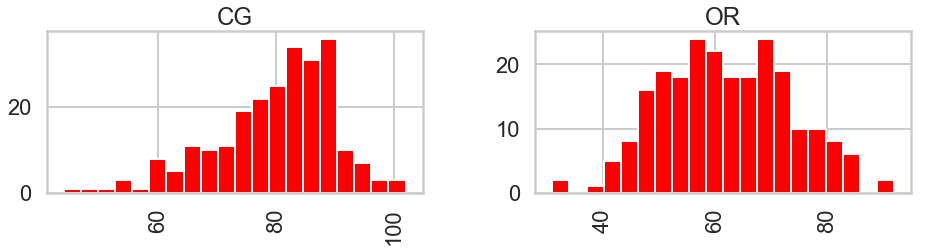

In [44]:
df.hist(column='length',by='label',bins=20,color='red',figsize=(15,3))
plt.show()

In [45]:
checkNULL=df.isnull()
df[checkNULL].head()

,category,rating,label,text_,length
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [46]:
df.length.describe()


count    472.000000
mean      71.296610
std       13.893779
min       31.000000
25%       60.000000
50%       71.500000
75%       83.000000
max      102.000000
Name: length, dtype: float64

In [47]:
df["rating"].value_counts(normalize=True).to_frame()

,rating
5.0,0.699153
4.0,0.122881
3.0,0.084746
1.0,0.065678
2.0,0.027542


In [48]:
df["category"].value_counts().to_frame()

,category
Home_and_Kitchen_5,472


## SPLITTING THE DATA

In [49]:
x_train, x_test, y_train, y_test = train_test_split(
    df['text_'], df['label'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(df.shape[0])
traindf = format(x_train.shape[0])
testdf = format(x_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 472
Train dataset: 283
Test dataset: 189


# Converting categorical into numerical(string to numbers)

In [50]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(x_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_A= count_vectorizer.fit_transform(x_train)
test_B= count_vectorizer.transform(x_test)


Vocabulary: 
 {'great': 252, 'just': 298, 'order': 386, 'longer': 324, 'size': 513, 'curtains': 140, 'weren': 649, 'wide': 652, 'expected': 197, 'expecting': 198, 'tighter': 590, 'curtain': 139, 'bought': 61, 'gift': 238, 'daughter': 146, 'loved': 331, 'little': 321, 'shorter': 508, 'try': 610, 'christmas': 97, 'product': 430, 'sturdy': 560, 'nice': 373, 'design': 156, 'works': 663, 'wooden': 659, 'cup': 137, 'couple': 132, 'light': 316, 'problem': 428, 'kind': 302, 'hard': 262, 'mentioned': 349, 'cord': 125, 'kinda': 303, 'small': 519, 'hose': 281, 'stiff': 549, 'beat': 43, 'time': 591, 'tested': 577, 'easy': 180, 'installation': 293, 'highly': 273, 'functional': 232, 'priced': 426, 'right': 468, 'doesn': 169, 'warm': 635, 'sitting': 512, 'hours': 283, 'happy': 261, 'quality': 442, 'merchandise': 350, 'speedy': 541, 'delivery': 154, 'bowl': 62, 'fast': 206, 'shipping': 507, 'place': 417, 'special': 539, 'photos': 408, 'wall': 631, 've': 626, 'weeks': 646, 'exactly': 194, 'advertised'

## LOGISTIC REGRESSION MODEL

In [51]:
logistic = LogisticRegression()
logistic.fit(train_A, y_train)
prediction = logistic.predict(test_B)
logisticaccuracy = accuracy_score(y_test, prediction)*100

In [52]:
print('classification report:',classification_report(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
print('confusion matrix:',cm)
print('Accuracy Score:',accuracy_score(y_test,prediction))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction)*100,2)) + '%')

classification report:               precision    recall  f1-score   support

          CG       0.75      0.69      0.72        95
          OR       0.71      0.77      0.74        94

    accuracy                           0.73       189
   macro avg       0.73      0.73      0.73       189
weighted avg       0.73      0.73      0.73       189

confusion matrix: [[66 29]
 [22 72]]
Accuracy Score: 0.7301587301587301
Model Prediction Accuracy: 73.02%


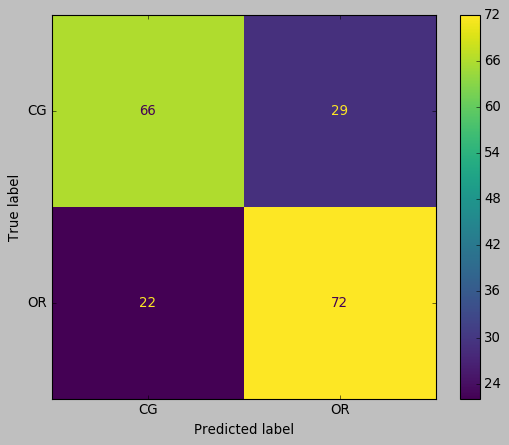

In [65]:
style.use('classic')
cm = confusion_matrix(y_test, prediction, labels=logistic.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic.classes_)
disp.plot()

# SUPPORT VECTOR MACHINE(SVM)

In [53]:
svm = SVC(kernel='linear')
svm.fit(train_A, y_train)
prediction1 = svm.predict(test_B)
svmaccuracy=accuracy_score(y_test,prediction1)*100

In [54]:
print('classification report:',classification_report(y_test,prediction1))
cm1=confusion_matrix(y_test,prediction1)
print("confusion matrix:",cm1)
print('Accuracy Score:',accuracy_score(y_test,prediction1))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction1)*100,2)) + '%')

classification report:               precision    recall  f1-score   support

          CG       0.72      0.68      0.70        95
          OR       0.70      0.73      0.72        94

    accuracy                           0.71       189
   macro avg       0.71      0.71      0.71       189
weighted avg       0.71      0.71      0.71       189

confusion matrix: [[65 30]
 [25 69]]
Accuracy Score: 0.708994708994709
Model Prediction Accuracy: 70.9%


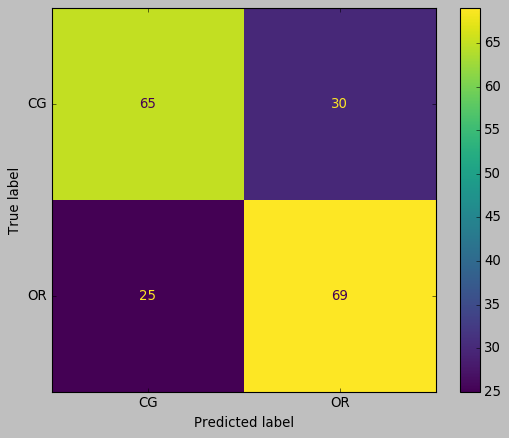

In [71]:
style.use('classic')
cm = confusion_matrix(y_test, prediction1, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

## RANDOM FOREST

In [55]:
rfc=RandomForestClassifier()
rfc.fit(train_A,y_train)
prediction2=rfc.predict(test_B)
rfcaccuracy=accuracy_score(y_test,prediction2)*100

In [56]:
print('classification report:',classification_report(y_test,prediction2))
cm2=confusion_matrix(y_test,prediction2)
print("confusion matrix:",cm2)
print('Accuracy Score:',accuracy_score(y_test,prediction2))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction2)*100,2)) + '%')

classification report:               precision    recall  f1-score   support

          CG       0.82      0.59      0.69        95
          OR       0.68      0.87      0.76        94

    accuracy                           0.73       189
   macro avg       0.75      0.73      0.72       189
weighted avg       0.75      0.73      0.72       189

confusion matrix: [[56 39]
 [12 82]]
Accuracy Score: 0.7301587301587301
Model Prediction Accuracy: 73.02%


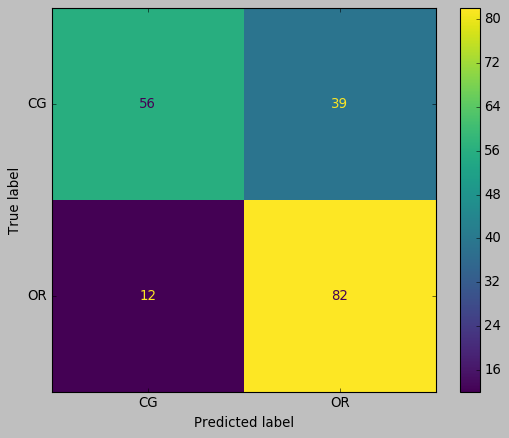

In [68]:
style.use('classic')
cm = confusion_matrix(y_test, prediction2, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

## DECISION TREE

In [57]:
dtree=DecisionTreeClassifier()
dtree.fit(train_A,y_train)
prediction3=dtree.predict(test_B)
dtreeaccuracy=accuracy_score(y_test,prediction3)*100

In [58]:
print('classification report:',classification_report(y_test,prediction3))
cm3=confusion_matrix(y_test,prediction3)
print("confusion matrix:",cm3)
print('Accuracy Score:',accuracy_score(y_test,prediction3))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction3)*100,2)) + '%')

classification report:               precision    recall  f1-score   support

          CG       0.65      0.57      0.61        95
          OR       0.61      0.69      0.65        94

    accuracy                           0.63       189
   macro avg       0.63      0.63      0.63       189
weighted avg       0.63      0.63      0.63       189

confusion matrix: [[54 41]
 [29 65]]
Accuracy Score: 0.6296296296296297
Model Prediction Accuracy: 62.96%


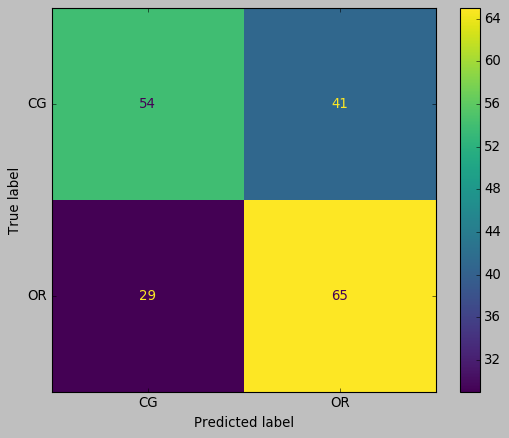

In [69]:
style.use('classic')
cm = confusion_matrix(y_test, prediction3, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

## K-NEIGHBORS

In [59]:
knn=KNeighborsClassifier()
knn.fit(train_A,y_train)
prediction4=knn.predict(test_B)
knnaccuracy=accuracy_score(y_test,prediction4)*100

In [60]:
print('classification report:',classification_report(y_test,prediction3))
cm4=confusion_matrix(y_test,prediction4)
print("confusion matrix:",cm4)
print('Accuracy Score:',accuracy_score(y_test,prediction4))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction4)*100,2)) + '%')

classification report:               precision    recall  f1-score   support

          CG       0.65      0.57      0.61        95
          OR       0.61      0.69      0.65        94

    accuracy                           0.63       189
   macro avg       0.63      0.63      0.63       189
weighted avg       0.63      0.63      0.63       189

confusion matrix: [[49 46]
 [23 71]]
Accuracy Score: 0.6349206349206349
Model Prediction Accuracy: 63.49%


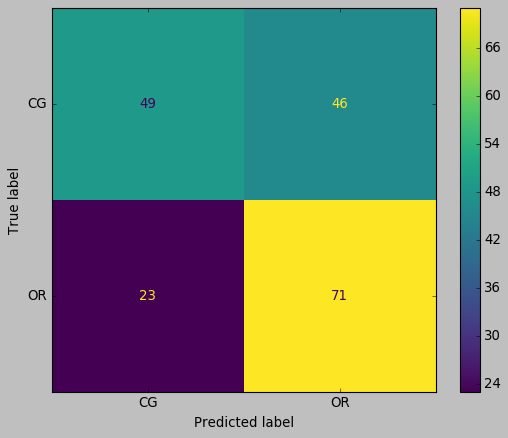

In [70]:
style.use('classic')
cm = confusion_matrix(y_test, prediction4, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

## CONCLUSION 

In [61]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction)*100,2)) + '%')
print('SVM Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction1)*100,2)) + '%')
print('Random Forest Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction2)*100,2)) + '%')
print('Decision Tree Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction3)*100,2)) + '%')
print('K neighbors Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,prediction4)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Model Prediction Accuracy: 73.02%
SVM Model Prediction Accuracy: 70.9%
Random Forest Model Prediction Accuracy: 73.02%
Decision Tree Model Prediction Accuracy: 62.96%
K neighbors Model Prediction Accuracy: 63.49%


Logistic Regression,Support Vector Machine(SVM),Random Forest Models are the fastest way to detect the fake online reviews 